In [37]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("waqi786/global-air-quality-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'global-air-quality-dataset' dataset.
Path to dataset files: /kaggle/input/global-air-quality-dataset


In [38]:
import pandas as pd
import numpy as np

!gdown "https://drive.google.com/uc?id=14pDFcdUxmFYyxBs0CQGMgEoGqgtaG9TR" -O global_air_quality_data_10000.csv
globalAqi=pd.read_csv("global_air_quality_data_10000.csv")
dfAqi=(globalAqi)
dfAqicopy=(dfAqi.copy())

Downloading...
From: https://drive.google.com/uc?id=14pDFcdUxmFYyxBs0CQGMgEoGqgtaG9TR
To: /content/global_air_quality_data_10000.csv
100% 788k/788k [00:00<00:00, 18.7MB/s]


In [39]:
dfAqi.head()

,City,Country,Date,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed
0,Bangkok,Thailand,2023-03-19,86.57,25.19,99.88,30.63,4.46,36.29,17.67,59.35,13.76
1,Istanbul,Turkey,2023-02-16,50.63,97.39,48.14,8.71,3.40,144.16,3.46,67.51,6.36
2,Rio de Janeiro,Brazil,2023-11-13,130.21,57.22,98.51,9.92,0.12,179.31,25.29,29.30,12.87
3,Mumbai,India,2023-03-16,119.70,130.52,10.96,33.03,7.74,38.65,23.15,99.97,7.71
4,Paris,France,2023-04-04,55.20,36.62,76.85,21.85,2.00,67.09,16.02,90.28,14.16


Q6: **How do different pollutants (PM2.5, PM10, NO2, CO, O3) correlate with each other?**

In [40]:
Pollutants=["PM2.5","PM10","NO2","SO2","CO","O3"]
corr = dfAqi[Pollutants].corr()
print(corr)


          PM2.5      PM10       NO2       SO2        CO        O3
PM2.5  1.000000  0.011353  0.004976 -0.012547  0.005891  0.007570
PM10   0.011353  1.000000  0.013427 -0.001040  0.007593 -0.000182
NO2    0.004976  0.013427  1.000000 -0.000544 -0.003200  0.016186
SO2   -0.012547 -0.001040 -0.000544  1.000000  0.016734  0.002611
CO     0.005891  0.007593 -0.003200  0.016734  1.000000  0.005571
O3     0.007570 -0.000182  0.016186  0.002611  0.005571  1.000000


The above correlation matrix shows how strongly each pollutant is related to the others.
the correlation values in the range between -1 and +1.

+1 means a perfect positive relationship - When one increases, the other also increases.

-1 means a perfect negative relationship - when one increases,  the other decreases.

0 means no clear relatioship.

Each cell in the table shows the correlation between two pollutants. The diagonal (1.00) values just means each pollutant is perfectly correalated with itself.


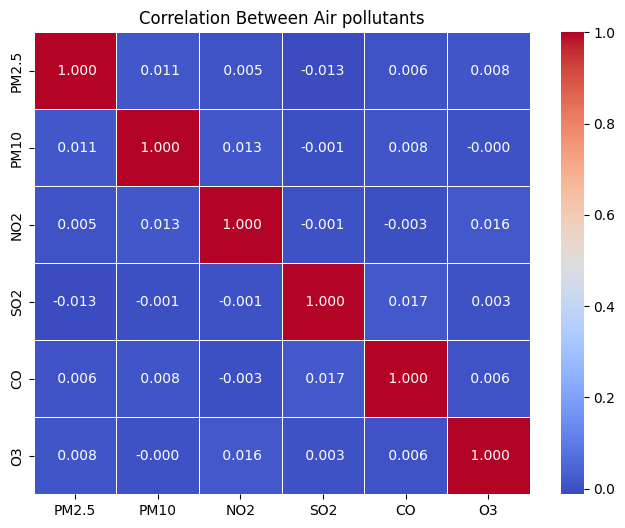

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,cmap="coolwarm",fmt=" .3f",linewidths=0.5)
plt.title("Correlation Between Air pollutants")
plt.show()


Red color => High positive correlation(close to +1) -> It means when one pollutant increases, the other tends to increases as well.

Blue color => Low or negative correlation (closer to 0 or -1) -> It means there is weak or no realtioship, or when one increases, the other may decrease.

CONCLUSION =>

The correlations between pollutants are all very close to zero,  meaning there is no strong relationship among them.

The correlations are so low probably beacuse the dataset combines data from multiple cities and dates, where each pollutants in this dataset are mostly independent they might come from different sources or vary differently across locations and differently depending upon on local sources, weather and traffic conditions.

**Q2** :  **How has air quality changed   over the last 20 years globally and regionally?**

In [42]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("krishd123/urban-air-quality-and-climate-dataset-1958-2025")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'urban-air-quality-and-climate-dataset-1958-2025' dataset.
Path to dataset files: /kaggle/input/urban-air-quality-and-climate-dataset-1958-2025


In [43]:
import pandas as pd
import numpy as np

!gdown "https://drive.google.com/uc?id=1_8Ez_TKSGlb-X6ZqDoq9E9NRZxvTQADI" -O air_quality_global.csv
globalData=pd.read_csv("air_quality_global.csv")
dfGlobal=(globalData)
dfGlobalcopy=(dfGlobal.copy())

Downloading...
From: https://drive.google.com/uc?id=1_8Ez_TKSGlb-X6ZqDoq9E9NRZxvTQADI
To: /content/air_quality_global.csv
100% 591k/591k [00:00<00:00, 32.8MB/s]


In [44]:
dfGlobal.head()

,city,country,latitude,longitude,year,month,pm25_ugm3,no2_ugm3,data_quality,measurement_method,data_source
0,New York,USA,40.7128,-74.006,1999,1,18.11,35.98,Moderate,Reference/Equivalent Method,EPA_AQS
1,New York,USA,40.7128,-74.006,1999,2,27.79,17.71,Good,Reference/Equivalent Method,EPA_AQS
2,New York,USA,40.7128,-74.006,1999,3,12.05,40.99,Moderate,Reference/Equivalent Method,EPA_AQS
3,New York,USA,40.7128,-74.006,1999,4,35.25,17.18,Poor,Reference/Equivalent Method,EPA_AQS
4,New York,USA,40.7128,-74.006,1999,5,38.39,25.07,Good,Reference/Equivalent Method,EPA_AQS


In [45]:
dfGlobal['Date'] = pd.to_datetime(dfGlobal['year'].astype(str) + '-' + dfGlobal['month'].astype(str) + '-01')
print(dfGlobal['Date'].min(), dfGlobal['Date'].max())
print(dfGlobal['city'].nunique(), "cities")
print(dfGlobal['country'].nunique(), "country")


1999-01-01 00:00:00 2025-12-01 00:00:00
20 cities
10 country


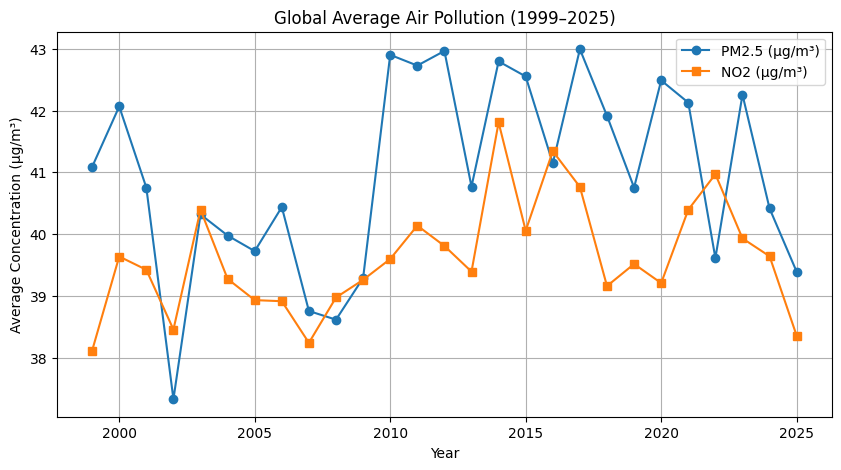

In [46]:
yearly_avg = dfGlobal.groupby('year')[['pm25_ugm3', 'no2_ugm3']].mean().reset_index()
plt.figure(figsize=(10,5))
plt.plot(yearly_avg['year'], yearly_avg['pm25_ugm3'], marker='o', label='PM2.5 (µg/m³)')
plt.plot(yearly_avg['year'], yearly_avg['no2_ugm3'], marker='s', label='NO2 (µg/m³)')
plt.title('Global Average Air Pollution (1999–2025)')
plt.xlabel('Year')
plt.ylabel('Average Concentration (µg/m³)')
plt.legend()
plt.grid(True)
plt.show()


**• PM2.5:**
Global PM2.5 levels stayed high for 20 years with small ups and downs but no major long-term improvement.

**• NO₂:**
NO₂ levels also fluctuated slightly but remained almost stable, showing continued traffic and industrial pollution.

**• Overall:**
Air quality has not improved significantly in the last two decades — only small recent declines due to cleaner energy policies.

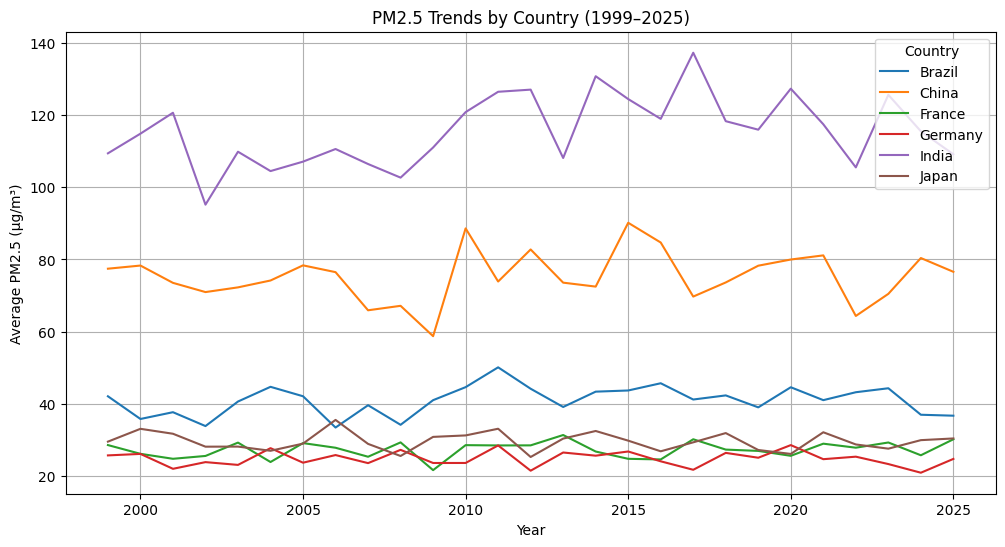

In [47]:
regional = dfGlobal.groupby(['country', 'year'])[['pm25_ugm3']].mean().reset_index()

top_countries = regional['country'].value_counts().nlargest(6).index.tolist()

plt.figure(figsize=(12,6))
sns.lineplot(data=regional[regional['country'].isin(top_countries)],
             x='year', y='pm25_ugm3', hue='country')
plt.title('PM2.5 Trends by Country (1999–2025)')
plt.xlabel('Year')
plt.ylabel('Average PM2.5 (µg/m³)')
plt.legend(title='Country')
plt.grid(True)
plt.show()


=> India has the highest PM2.5 levels throughout (very polluted + unstable).

=> China has high pollution, but shows major improvement after 2010, though still fluctuates.

=> Brazil stays moderate, with PM2.5 around 35–50, mostly stable.

=> France, Germany, and Japan have low pollution (around 20–30), consistently clean air.

=> Germany is the cleanest among all countries shown.

=> India and China dominate the upper range, while Europe + Japan stay in the safe zone.

=>Overall trend: Developed countries remain stable and clean; developing countries show higher PM2.5 and more fluctuations.

In [48]:
import kagglehub

path = kagglehub.dataset_download("sujaykapadnis/energy")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'energy' dataset.
Path to dataset files: /kaggle/input/energy


In [49]:
import numpy as np
import pandas as pd
!gdown "https://drive.google.com/uc?id=1lIOsqdateg91x2AlSjYJnm3Zbj4k0_3P" -O owid-energy.csv
energy=pd.read_csv("owid-energy.csv")
dfEnergy=(energy)
dfEnergycopy=(dfEnergy.copy())



Downloading...
From: https://drive.google.com/uc?id=1lIOsqdateg91x2AlSjYJnm3Zbj4k0_3P
To: /content/owid-energy.csv
100% 8.32M/8.32M [00:00<00:00, 26.7MB/s]


In [50]:
dfEnergy

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,Afghanistan,1900,AFG,4832414.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1901,AFG,4879685.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1902,AFG,4935122.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1903,AFG,4998861.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1904,AFG,5063419.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21885,Zimbabwe,2017,ZWE,14751101.0,2.194784e+10,NaN,NaN,NaN,NaN,21.693,...,0.136,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
21886,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,NaN,NaN,NaN,NaN,25.910,...,0.218,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
21887,Zimbabwe,2019,ZWE,15354606.0,NaN,NaN,NaN,NaN,NaN,24.748,...,0.364,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
21888,Zimbabwe,2020,ZWE,15669663.0,NaN,NaN,NaN,NaN,NaN,22.336,...,0.395,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN


In [51]:
columns_to_select = ['country', 'year', 'coal_share_energy', 'gas_share_energy', 'renewables_share_energy']
energy_mix_data = dfEnergy[columns_to_select].copy()

energy_share_columns = ['coal_share_energy', 'gas_share_energy', 'renewables_share_energy']
for col in energy_share_columns:
    energy_mix_data[col] = energy_mix_data[col].fillna(0)

print("Energy mix data prepared with selected columns and missing values filled.")
energy_mix_data.head()

Energy mix data prepared with selected columns and missing values filled.


,country,year,coal_share_energy,gas_share_energy,renewables_share_energy
0,Afghanistan,1900,0.0,0.0,0.0
1,Afghanistan,1901,0.0,0.0,0.0
2,Afghanistan,1902,0.0,0.0,0.0
3,Afghanistan,1903,0.0,0.0,0.0
4,Afghanistan,1904,0.0,0.0,0.0


In [52]:
energy_mix_data = energy_mix_data.groupby(['country', 'year'])[energy_share_columns].mean().reset_index()
print("Energy mix data aggregated by country and year.")
energy_mix_data.head()

Energy mix data aggregated by country and year.


,country,year,coal_share_energy,gas_share_energy,renewables_share_energy
0,Afghanistan,1900,0.0,0.0,0.0
1,Afghanistan,1901,0.0,0.0,0.0
2,Afghanistan,1902,0.0,0.0,0.0
3,Afghanistan,1903,0.0,0.0,0.0
4,Afghanistan,1904,0.0,0.0,0.0



=> Prepare the energy mix data by selecting 'country', 'year', 'coal_share_energy', 'gas_share_energy', and 'renewables_share_energy' from `dfEnergy`, filling any missing values in the share columns with 0.

=> prepare the air quality data by selecting 'country', 'year', and 'pm25_ugm3' from `dfGlobal`, calculating the yearly average of PM2.5 for each country and year, and dropping rows with any remaining missing PM2.5 data.

=> Merge these prepared energy and air quality datasets on 'country' and 'year'.

=> **calculate the correlation matrix between the energy share columns and the PM2.5 levels.**


In [53]:
import pandas as pd
import numpy as np

!gdown "https://drive.google.com/uc?id=1_8Ez_TKSGlb-X6ZqDoq9E9NRZxvTQADI" -O air_quality_global.csv
globalData=pd.read_csv("air_quality_global.csv")
dfGlobal=(globalData)
dfGlobalcopy=(dfGlobal.copy())

aq_data = dfGlobal[['country', 'year', 'pm25_ugm3']].copy()

yearly_avg_aq = aq_data.groupby(['country', 'year'])['pm25_ugm3'].mean().reset_index()

yearly_avg_aq.dropna(subset=['pm25_ugm3'], inplace=True)

print("Air quality data prepared with yearly averages of PM2.5 and missing values handled.")
yearly_avg_aq.head()

Downloading...
From: https://drive.google.com/uc?id=1_8Ez_TKSGlb-X6ZqDoq9E9NRZxvTQADI
To: /content/air_quality_global.csv
100% 591k/591k [00:00<00:00, 31.7MB/s]
Air quality data prepared with yearly averages of PM2.5 and missing values handled.


,country,year,pm25_ugm3
0,Brazil,1999,42.033333
1,Brazil,2000,35.737500
2,Brazil,2001,37.618333
3,Brazil,2002,33.769167
4,Brazil,2003,40.583333


In [54]:
merged_data = pd.merge(energy_mix_data, yearly_avg_aq, on=['country', 'year'], how='inner')
print("Energy mix and air quality data merged successfully.")
merged_data.head()

Energy mix and air quality data merged successfully.


,country,year,coal_share_energy,gas_share_energy,renewables_share_energy,pm25_ugm3
0,Brazil,1999,6.293,3.456,43.144,42.033333
1,Brazil,2000,6.591,4.231,43.288,35.737500
2,Brazil,2001,6.640,5.483,39.112,37.618333
3,Brazil,2002,6.268,6.318,40.757,33.769167
4,Brazil,2003,6.384,6.942,42.284,40.583333


In [55]:
correlation_columns = ['coal_share_energy', 'gas_share_energy', 'renewables_share_energy', 'pm25_ugm3']
correlation_matrix = merged_data[correlation_columns].corr()
print("Correlation matrix calculated successfully:")
print(correlation_matrix)

Correlation matrix calculated successfully:
                         coal_share_energy  gas_share_energy  \
coal_share_energy                 1.000000         -0.268624   
gas_share_energy                 -0.268624          1.000000   
renewables_share_energy          -0.171247         -0.039707   
pm25_ugm3                         0.601886         -0.418416   

                         renewables_share_energy  pm25_ugm3  
coal_share_energy                      -0.171247   0.601886  
gas_share_energy                       -0.039707  -0.418416  
renewables_share_energy                 1.000000  -0.196610  
pm25_ugm3                              -0.196610   1.000000  


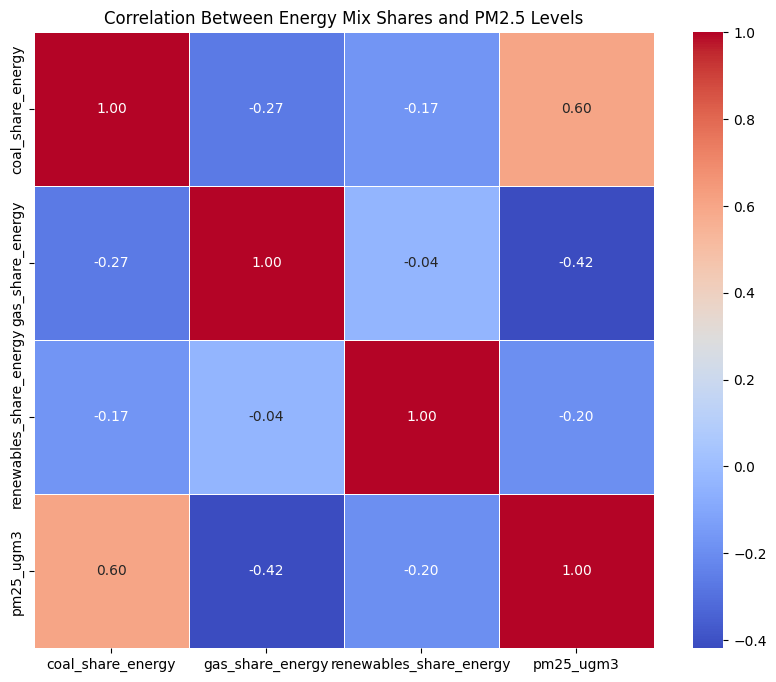

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Between Energy Mix Shares and PM2.5 Levels')
plt.show()




#### Correlations Between Energy Mix and PM2.5 Levels

*   **Coal Share and PM2.5**: There is a relatively strong **positive correlation (0.60)** between `coal_share_energy` and `pm25_ugm3`.

  =>This suggests that countries with a higher share of coal in their energy mix tend to have higher PM2.5 levels. This aligns with the understanding that coal combustion is a significant source of particulate matter pollution.

*   **Gas Share and PM2.5**: A moderate **negative correlation (-0.42)** exists between `gas_share_energy` and `pm25_ugm3`.
  =>This indicates that as the share of natural gas in a country's energy mix increases, PM2.5 levels tend to decrease. Natural gas is generally considered a cleaner-burning fossil fuel compared to coal, producing less particulate matter.

*   **Renewables Share and PM2.5**: There is a weak **negative correlation (-0.20)** between `renewables_share_energy` and `pm25_ugm3`.
  =>While the correlation is not as strong as with coal or gas, it suggests that a higher share of renewable energy sources is associated with slightly lower PM2.5 levels. This is expected, as renewable energy sources typically produce minimal to no air pollutants during operation.

**Implications for Air Quality Management and Energy Policy**:

* Countries with a higher share of **coal** in their energy mix tend to have **higher PM2.5 pollution levels**.
* **Coal-based energy generation** is a major contributor to poor air quality.
* Increasing the share of **natural gas** in the energy mix is associated with **lower PM2.5 concentrations**.
* **Renewable energy sources** (like solar, wind, hydro) also help improve PM2.5 levels, though the impact may be slightly less direct compared to natural gas.
* The findings emphasize the need for countries to **reduce dependency on coal** to improve air quality.
* Transitioning to **cleaner energy alternatives**, especially natural gas and renewables, can significantly help **mitigate air pollution**.
* Shifting to low-pollution energy sources plays an important role in **protecting public health** and promoting sustainable development.


### Data Analysis Key Findings
*   **Data Preparation and Merging**: Energy mix data (coal, gas, renewables shares) and air quality data (yearly average PM2.5) were successfully prepared by selecting relevant columns, handling missing values, and then merged based on 'country' and 'year'.
*   **Correlation with Coal Share**: There is a strong positive correlation (0.60) between the share of coal in a country's energy mix and its PM2.5 levels, indicating that higher coal usage is associated with increased air pollution.
*   **Correlation with Gas Share**: A moderate negative correlation (-0.42) was observed between the share of natural gas in the energy mix and PM2.5 levels, suggesting that greater reliance on natural gas is linked to lower PM2.5 concentrations.
*   **Correlation with Renewables Share**: A weak negative correlation (-0.20) was found between the share of renewable energy sources and PM2.5 levels, implying that increased adoption of renewables is mildly associated with reduced PM2.5 pollution.



## Analyze Global and Regional Air Quality Trends

how PM2.5 and NO2 levels have changed over time (1999-2025) globally and across different countries using the `dfGlobal` dataset by examining existing plots and creating a new one for regional NO2 trends, then summarizing the observations.


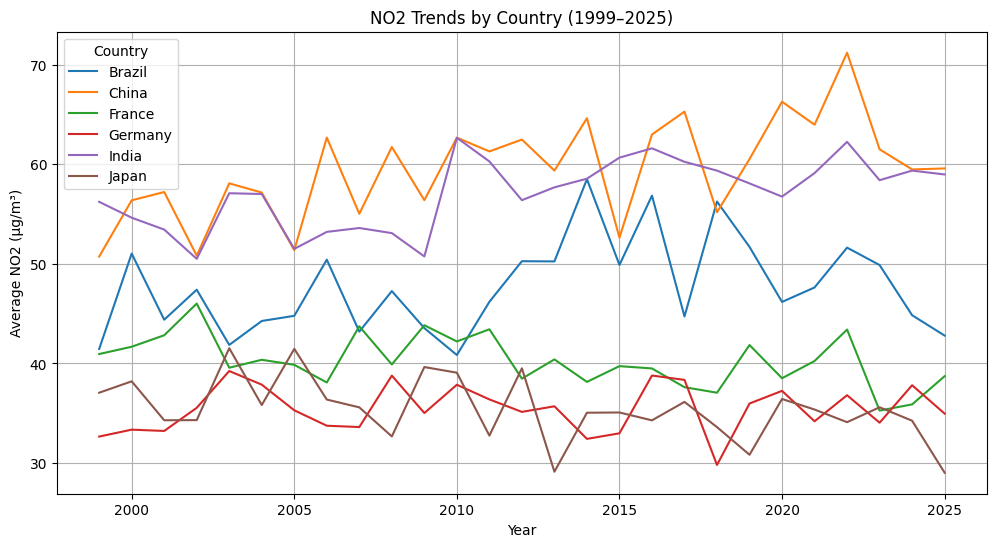

In [57]:
regional_no2 = dfGlobal.groupby(['country', 'year'])[['no2_ugm3']].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=regional_no2[regional_no2['country'].isin(top_countries)],
             x='year', y='no2_ugm3', hue='country')
plt.title('NO2 Trends by Country (1999–2025)')
plt.xlabel('Year')
plt.ylabel('Average NO2 (µg/m³)')
plt.legend(title='Country')
plt.grid(True)
plt.show()


**key findings**:

* **Global air quality is improving** overall for both PM2.5 and NO₂ from 1999–2025.
* **PM2.5 levels globally are slowly decreasing**, though with some ups and downs.
* **NO₂ levels are also dropping worldwide**, showing cleaner air over time.
* **China shows the biggest improvement**, reducing very high PM2.5 levels through strong policies.
* Other countries show **mixed results**—some improving slowly, some showing fluctuations.
* **Air pollution trends vary by region** because of differences in industry, traffic, and environmental rules.
* Many countries are improving NO₂ levels due to **better vehicle standards and cleaner fuels**.
* Overall, **air quality is getting better**, but **some regions still face serious pollution problems** and need stronger actions.


## Examine the Evolution of Energy Mix




In [58]:
filtered_energy_mix = energy_mix_data[energy_mix_data['country'].isin(top_countries)]
print("Filtered energy mix data for top countries:")
filtered_energy_mix.head()

Filtered energy mix data for top countries:


,country,year,coal_share_energy,gas_share_energy,renewables_share_energy
2807,Brazil,1900,0.0,0.0,0.0
2808,Brazil,1901,0.0,0.0,0.0
2809,Brazil,1902,0.0,0.0,0.0
2810,Brazil,1903,0.0,0.0,0.0
2811,Brazil,1904,0.0,0.0,0.0


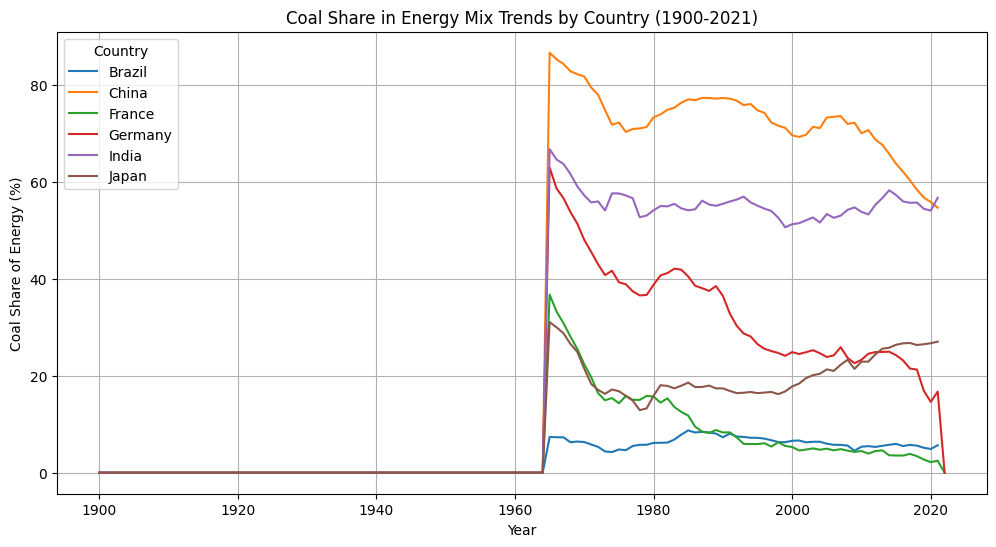

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_energy_mix, x='year', y='coal_share_energy', hue='country')
plt.title('Coal Share in Energy Mix Trends by Country (1900-2021)')
plt.xlabel('Year')
plt.ylabel('Coal Share of Energy (%)')
plt.legend(title='Country')
plt.grid(True)
plt.show()



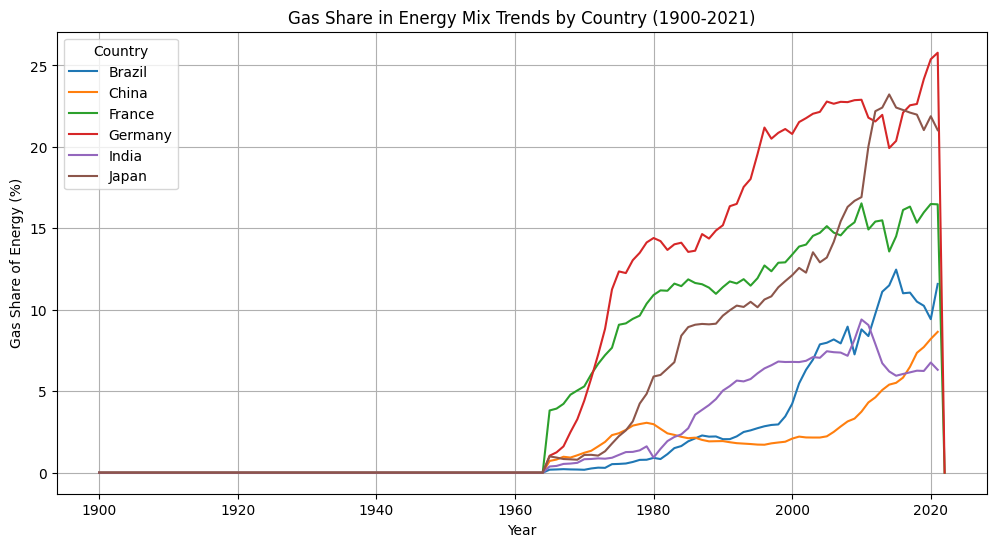

In [60]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_energy_mix, x='year', y='gas_share_energy', hue='country')
plt.title('Gas Share in Energy Mix Trends by Country (1900-2021)')
plt.xlabel('Year')
plt.ylabel('Gas Share of Energy (%)')
plt.legend(title='Country')
plt.grid(True)
plt.show()



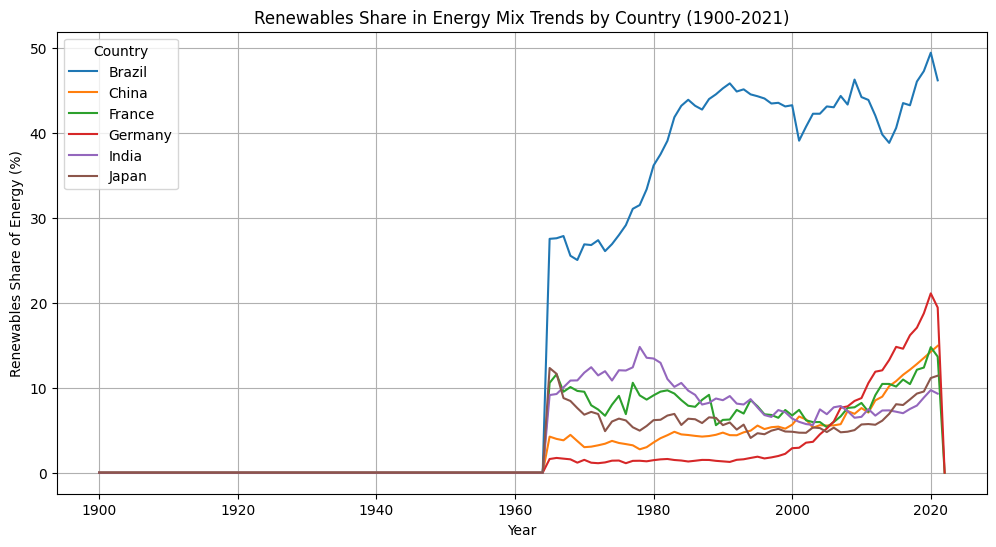

In [61]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_energy_mix, x='year', y='renewables_share_energy', hue='country')
plt.title('Renewables Share in Energy Mix Trends by Country (1900-2021)')
plt.xlabel('Year')
plt.ylabel('Renewables Share of Energy (%)')
plt.legend(title='Country')
plt.grid(True)
plt.show()



1. Coal

==> Developed countries (USA, France, Germany, Japan) show a big decline in coal use.

==>China and India saw coal rise for decades, then recent slow decline.

Countries like Brazil have almost no coal use.

2. Natural Gas

==>Gas use increased steadily, especially after 1950.

Many nations used gas as a cleaner replacement for coal.

Growth varies depending on gas resources and import capacity.

3. Renewables

==>Renewables show slow growth at first, then rapid increase recently.

Brazil had high renewable share early (hydropower).

Most countries are now accelerating wind & solar adoption.

Overall

Countries are moving away from coal, using more gas, and rapidly growing renewables. This shift is key for better air quality and lower emissions worldwide.

## Correlate Economic Development with Air Quality

### Subtask:
Prepare economic data from `dfEnergy` by selecting relevant columns, handling missing values, and ensuring a consistent format for merging.


**Reasoning**:
I need to select the specified columns ('country', 'year', 'gdp', 'population') from the `dfEnergy` DataFrame to create `economic_data` and then drop rows where 'gdp' or 'population' have missing values, as per the instructions.



In [62]:
economic_data = dfEnergy[['country', 'year', 'gdp', 'population']].copy()
economic_data.dropna(subset=['gdp', 'population'], inplace=True)

print("Economic data prepared by selecting relevant columns and handling missing values.")
economic_data.head()

Economic data prepared by selecting relevant columns and handling missing values.


,country,year,gdp,population
50,Afghanistan,1950,9.421400e+09,7480464.0
51,Afghanistan,1951,9.692280e+09,7571542.0
52,Afghanistan,1952,1.001733e+10,7667534.0
53,Afghanistan,1953,1.063052e+10,7764549.0
54,Afghanistan,1954,1.086636e+10,7864289.0


## Merge economic data with air quality data

### Subtask:
Merge the prepared `economic_data` with the `yearly_avg_aq` DataFrame on 'country' and 'year' to combine economic indicators with air quality metrics.


**Reasoning**:
I need to merge the `economic_data` DataFrame with the `yearly_avg_aq` DataFrame on 'country' and 'year' columns using an inner join and then display the head of the new merged DataFrame, as per the instructions.



In [63]:
merged_economic_aq = pd.merge(economic_data, yearly_avg_aq, on=['country', 'year'], how='inner')
print("Economic and air quality data merged successfully.")
merged_economic_aq.head()

Economic and air quality data merged successfully.


,country,year,gdp,population,pm25_ugm3
0,Brazil,1999,1.641348e+12,173486272.0,42.033333
1,Brazil,2000,1.734491e+12,175873712.0,35.737500
2,Brazil,2001,1.780379e+12,178211888.0,37.618333
3,Brazil,2002,1.857599e+12,180476688.0,33.769167
4,Brazil,2003,1.902061e+12,182629280.0,40.583333


## Correlate Economic Development with Air Quality


Calculate the correlation matrix between GDP, population, and PM2.5 levels using the `merged_economic_aq` DataFrame.


In [64]:
correlation_economic_aq = merged_economic_aq[['gdp', 'population', 'pm25_ugm3']].corr()
print("Correlation matrix between economic indicators and PM2.5 levels:")
print(correlation_economic_aq)

Correlation matrix between economic indicators and PM2.5 levels:
                 gdp  population  pm25_ugm3
gdp         1.000000    0.753643   0.337444
population  0.753643    1.000000   0.805210
pm25_ugm3   0.337444    0.805210   1.000000


**Reasoning**:
The correlation matrix between economic indicators and PM2.5 has been calculated. The next logical step is to visualize this correlation using a heatmap to better understand the relationships, similar to how the energy mix correlations were visualized.



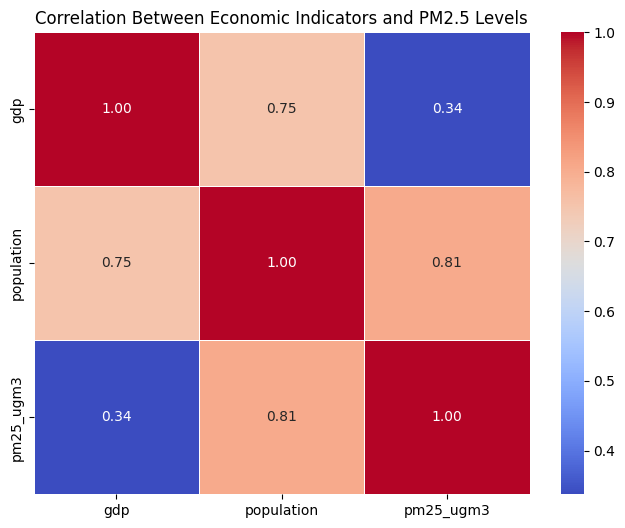

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_economic_aq, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Between Economic Indicators and PM2.5 Levels')
plt.show()


#### Summary of Correlations Between Economic Indicators and PM2.5 Levels

Upon examining the correlation matrix and the heatmap, several relationships between economic indicators (GDP and Population) and PM2.5 levels can be observed:

*   **Population and PM2.5**: There is a strong **positive correlation (0.81) between `population` and `pm25_ugm3`**. This suggests that countries with higher populations tend to have higher PM2.5 levels. This aligns with the understanding that larger populations often lead to increased human activities (industrial, residential, transportation), which are sources of air pollution.

*   **GDP and PM2.5**: A moderate **positive correlation (0.34) exists between `gdp` and `pm25_ugm3`**. This indicates that countries with **higher GDP tend to have higher PM2.5 levels**. While not as strong as the population correlation, it suggests that economic activity, particularly in industrial sectors, can contribute to air pollution.

* **GDP and Population**: There is a strong **positive correlation (0.75)** between `gdp` and `population`. This is an expected relationship, as larger population often contribute to a larger economy.



**Population** => PM2.5 (Strong correlation: 0.81)

1. Countries with larger populations tend to have higher PM2.5 levels.

2. More people → more vehicles, industries, energy usage → more air pollution.

3. Population is the strongest predictor of PM2.5 in this dataset.

**GDP** => Population (Strong correlation: 0.75)

1. Economically strong countries usually have larger populations.

2. Big economies like China, India, and the USA drive this relationship.

3. GDP → PM2.5 (Weak correlation: 0.34)

=> Economic growth does not strongly determine air pollution.

=> Some rich countries (e.g., Europe) have low pollution due to strict    regulations.

=>Some lower-income countries rely on coal/biomass → higher PM2.5.

=> GDP alone is not a strong driver of PM2.5 levels.

=>Overall Insight

=>Population is the key factor influencing PM2.5 levels.

=>GDP has indirect effects but is not a strong predictor of pollution.

Policies, technology, and energy sources matter more than GDP.

## Analyze Pollutant and Weather Correlations for 2023



In [66]:
dfAqi['Date'] = pd.to_datetime(dfAqi['Date'])
dfAqi_2023 = dfAqi[dfAqi['Date'].dt.year == 2023].copy()
print("dfAqi filtered for 2023:")
dfAqi_2023.head()

dfAqi filtered for 2023:


,City,Country,Date,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed
0,Bangkok,Thailand,2023-03-19,86.57,25.19,99.88,30.63,4.46,36.29,17.67,59.35,13.76
1,Istanbul,Turkey,2023-02-16,50.63,97.39,48.14,8.71,3.40,144.16,3.46,67.51,6.36
2,Rio de Janeiro,Brazil,2023-11-13,130.21,57.22,98.51,9.92,0.12,179.31,25.29,29.30,12.87
3,Mumbai,India,2023-03-16,119.70,130.52,10.96,33.03,7.74,38.65,23.15,99.97,7.71
4,Paris,France,2023-04-04,55.20,36.62,76.85,21.85,2.00,67.09,16.02,90.28,14.16


In [67]:
pollutant_weather_columns = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'Temperature', 'Humidity', 'Wind Speed']
correlation_pollutant_weather = dfAqi_2023[pollutant_weather_columns].corr()
print("Correlation matrix between pollutants and weather conditions (2023):")
print(correlation_pollutant_weather)

Correlation matrix between pollutants and weather conditions (2023):
                PM2.5      PM10       NO2       SO2        CO        O3  \
PM2.5        1.000000  0.011353  0.004976 -0.012547  0.005891  0.007570   
PM10         0.011353  1.000000  0.013427 -0.001040  0.007593 -0.000182   
NO2          0.004976  0.013427  1.000000 -0.000544 -0.003200  0.016186   
SO2         -0.012547 -0.001040 -0.000544  1.000000  0.016734  0.002611   
CO           0.005891  0.007593 -0.003200  0.016734  1.000000  0.005571   
O3           0.007570 -0.000182  0.016186  0.002611  0.005571  1.000000   
Temperature -0.011945 -0.000147 -0.009932 -0.002289 -0.008902  0.010013   
Humidity    -0.000947  0.006086  0.000523  0.001448  0.011034  0.008803   
Wind Speed  -0.001770  0.008772  0.004971  0.006126 -0.010892 -0.005967   

             Temperature  Humidity  Wind Speed  
PM2.5          -0.011945 -0.000947   -0.001770  
PM10           -0.000147  0.006086    0.008772  
NO2            -0.009932  0.00052

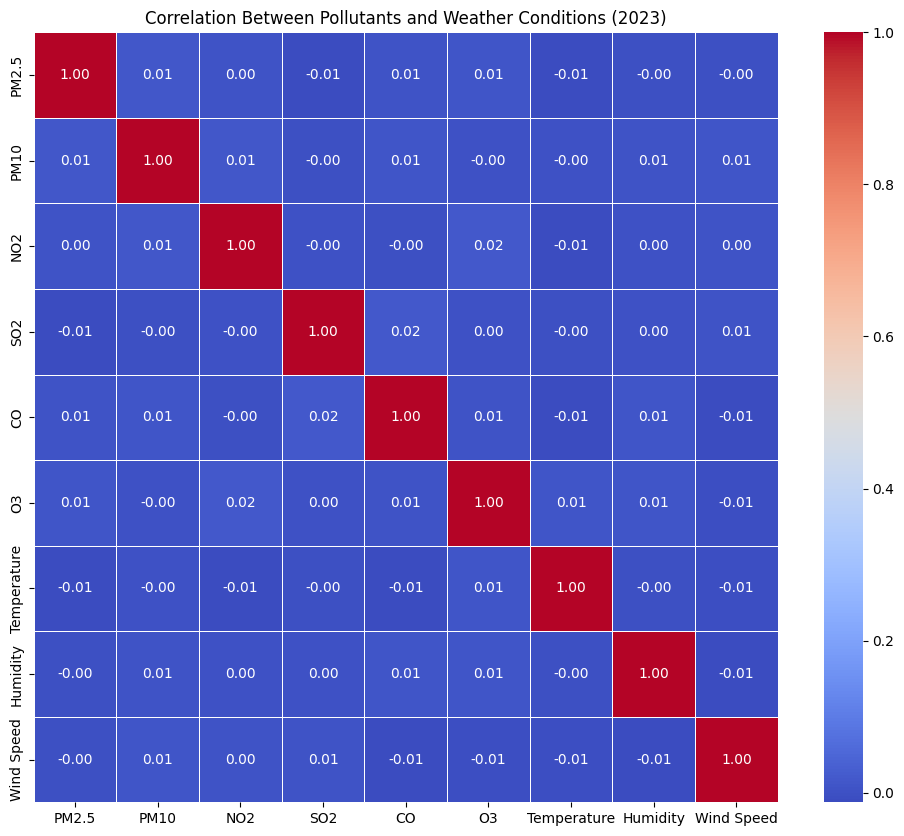

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_pollutant_weather, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Between Pollutants and Weather Conditions (2023)')
plt.show()



## Further Investigate Energy Transitions and Air Quality


**Identify countries that have undergone significant energy transitions and analyze the corresponding impact on their PM2.5 levels.**


=>calculate the change in 'coal_share_energy', 'gas_share_energy', and 'renewables_share_energy' for each country over the entire period available, by finding the difference between the earliest and latest years' shares.

=>This will help identify countries that have undergone significant energy transitions.



In [69]:
energy_share_changes = merged_data.groupby('country').apply(lambda x: pd.Series({
    'coal_share_change': x['coal_share_energy'].iloc[-1] - x['coal_share_energy'].iloc[0],
    'gas_share_change': x['gas_share_energy'].iloc[-1] - x['gas_share_energy'].iloc[0],
    'renewables_share_change': x['renewables_share_energy'].iloc[-1] - x['renewables_share_energy'].iloc[0]
})).reset_index()

print("Calculated energy share changes for each country:")
print(energy_share_changes.head())

Calculated energy share changes for each country:
   country  coal_share_change  gas_share_change  renewables_share_change
0   Brazil             -0.623             8.132                    3.076
1    China            -16.471             6.745                    9.758
2   France             -5.523           -12.913                   -7.389
3  Germany            -24.109           -21.097                   -2.228
4    India              6.084            -0.479                    2.186


/tmp/ipython-input-215274959.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  energy_share_changes = merged_data.groupby('country').apply(lambda x: pd.Series({


**Reasoning**:
Now that the energy share changes have been calculated, the next step is to identify countries that show a significant decrease in coal share and/or a significant increase in renewables share, as outlined in the subtask instructions. I will define 'significant' as the top 3 countries for each category to identify these transitions.



In [70]:
significant_coal_decrease_countries = energy_share_changes.sort_values(by='coal_share_change', ascending=True).head(3)['country'].tolist()
significant_renewables_increase_countries = energy_share_changes.sort_values(by='renewables_share_change', ascending=False).head(3)['country'].tolist()

significant_transition_countries = list(set(significant_coal_decrease_countries + significant_renewables_increase_countries))

print("Countries with significant decrease in coal share:", significant_coal_decrease_countries)
print("Countries with significant increase in renewables share:", significant_renewables_increase_countries)
print("Countries identified for significant energy transitions:", significant_transition_countries)

Countries with significant decrease in coal share: ['Germany', 'China', 'France']
Countries with significant increase in renewables share: ['China', 'Japan', 'Mexico']
Countries identified for significant energy transitions: ['Germany', 'Japan', 'Mexico', 'China', 'France']


In [71]:
transition_countries_data = merged_data[merged_data['country'].isin(significant_transition_countries)].copy()
print("Filtered data for significant transition countries:")
transition_countries_data.head()

Filtered data for significant transition countries:


,country,year,coal_share_energy,gas_share_energy,renewables_share_energy,pm25_ugm3
23,China,1999,71.131,1.903,5.188,77.435000
24,China,2000,69.587,2.093,5.657,78.305000
25,China,2001,69.252,2.217,6.619,73.505000
26,China,2002,69.714,2.166,6.280,70.947500
27,China,2003,71.327,2.160,5.301,72.253333


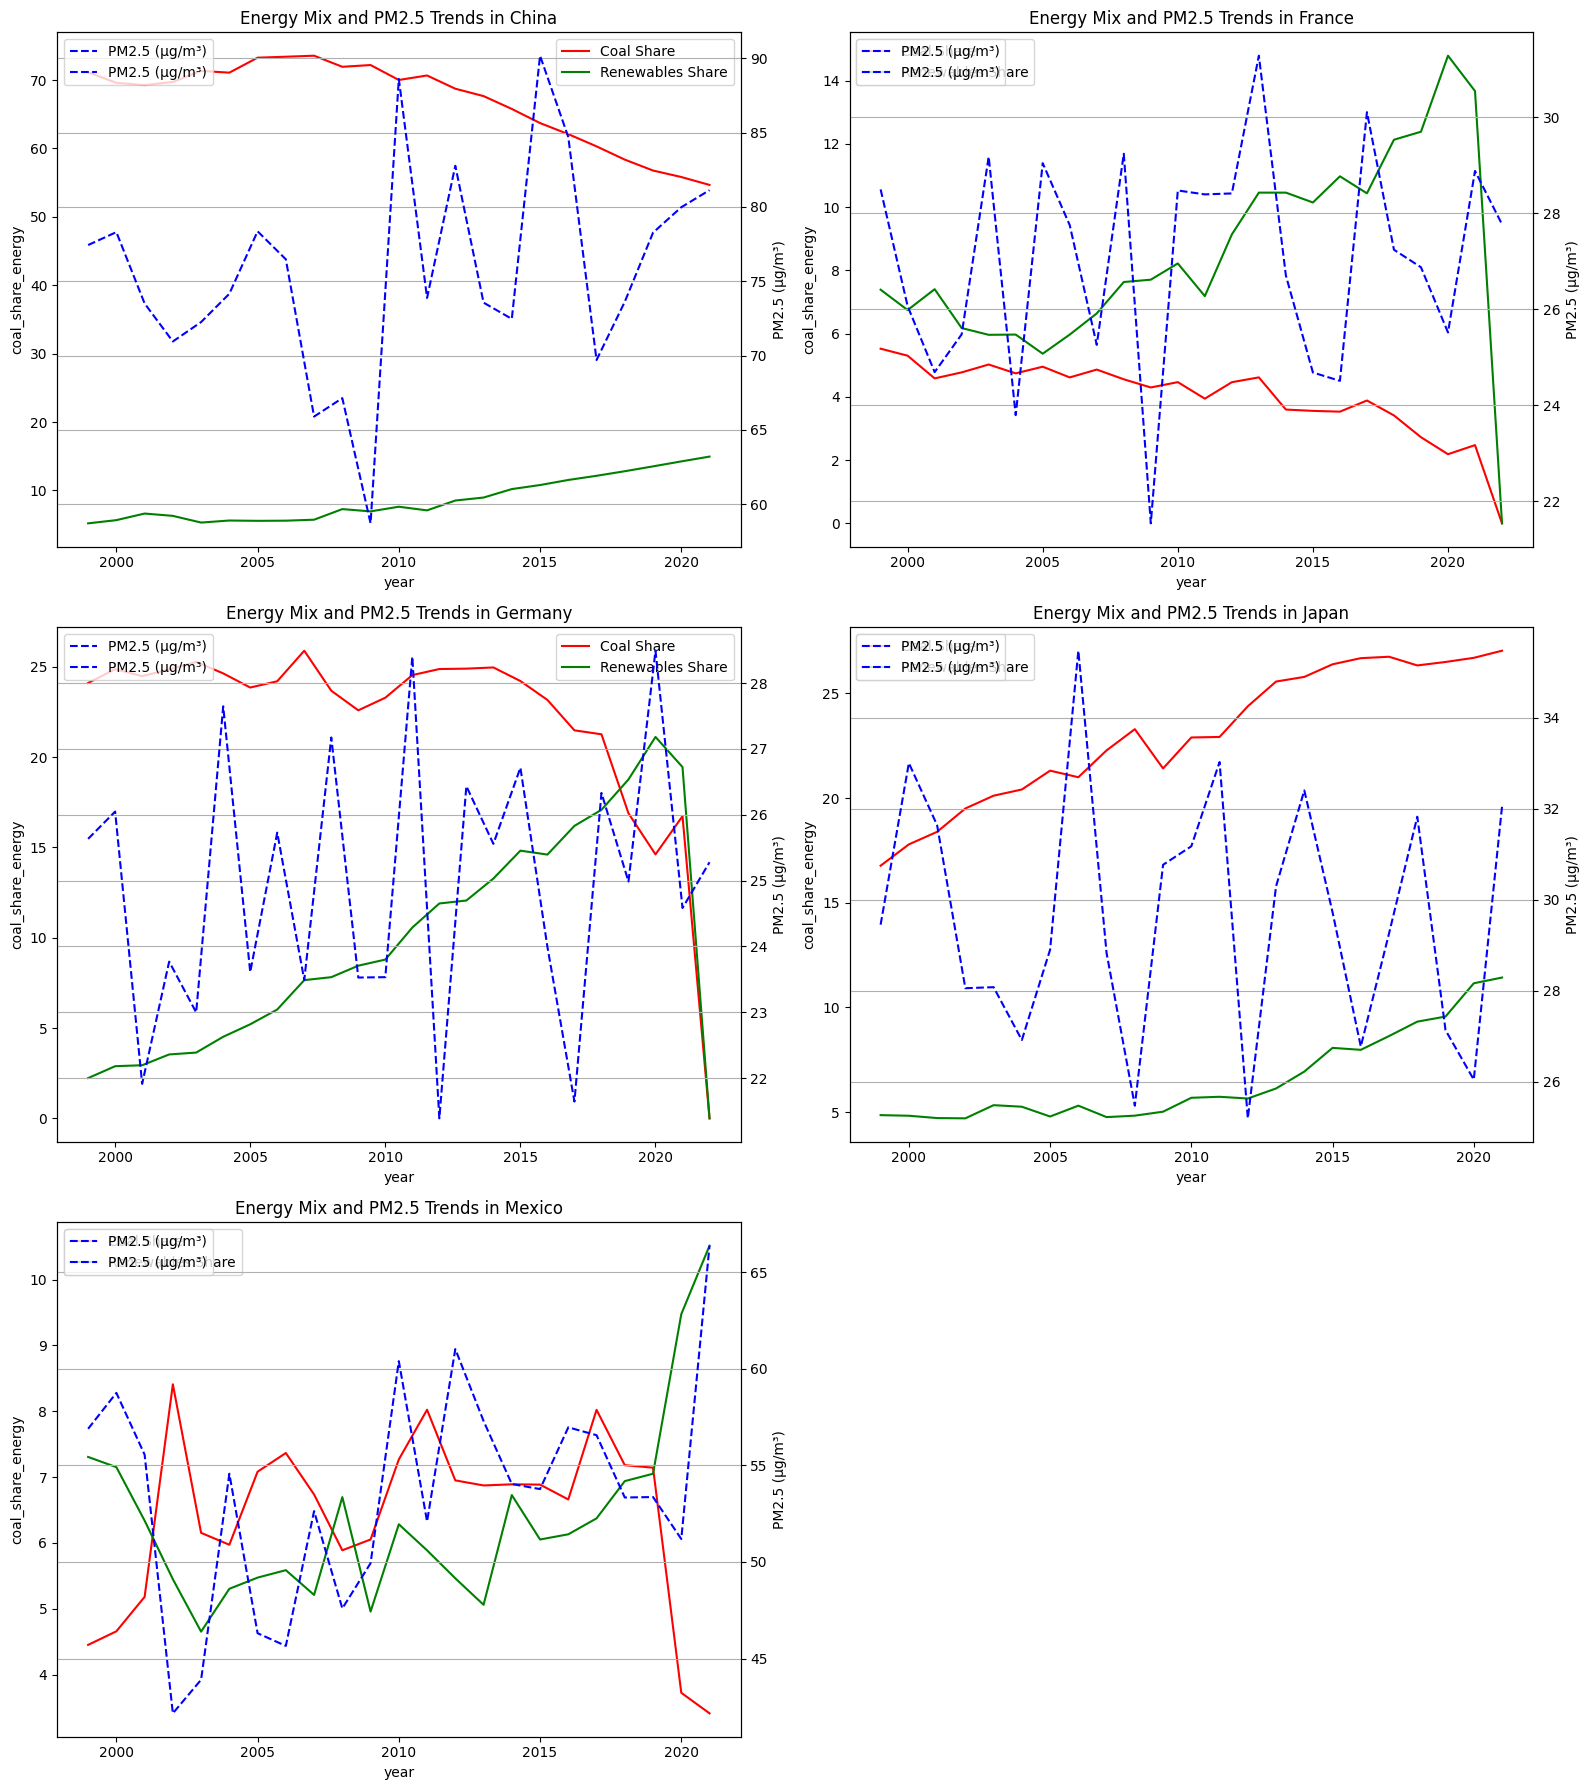

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# list of unique countries in the filtered data
countries = transition_countries_data['country'].unique()

# the number of rows and columns for subplots
num_countries = len(countries)
num_cols = 2
num_rows = (num_countries + num_cols - 1) // num_cols

plt.figure(figsize=(num_cols * 8, num_rows * 6))

for i, country in enumerate(countries):
    country_data = transition_countries_data[transition_countries_data['country'] == country]


    plt.subplot(num_rows, num_cols, i + 1)


    sns.lineplot(data=country_data, x='year', y='coal_share_energy', label='Coal Share', color='red')


    sns.lineplot(data=country_data, x='year', y='renewables_share_energy', label='Renewables Share', color='green')

    ax2 = plt.gca().twinx()
    sns.lineplot(data=country_data, x='year', y='pm25_ugm3', label='PM2.5 (µg/m³)', color='blue', linestyle='--', ax=ax2)

    plt.title(f'Energy Mix and PM2.5 Trends in {country}')
    plt.xlabel('Year')
    plt.ylabel('Energy Share (%)')
    ax2.set_ylabel('PM2.5 (µg/m³)')

    lines, labels = plt.gca().get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    plt.legend(lines + lines2, labels + labels2, loc='upper left')

    plt.grid(True)

plt.tight_layout()
plt.show()




**key findings**:

---

## **Slide: Data Analysis – Key Findings (Short & Simple)**

### **Air Quality Trends**

* Global **PM2.5 and NO₂ levels decreased** from 1999–2025.
* Countries like **China** showed major improvement in PM2.5.

### **Energy Mix Changes (1900–2021)**

* **Coal use decreased** in developed nations; India & China reduced coal only recently.
* **Natural gas increased** as a transition fuel.
* **Renewables grew steadily**, with faster growth in recent years.

### **Economic Factors & Pollution**

* **Population and PM2.5 strongly linked (0.81)** → more people = more pollution.
* **GDP moderately linked (0.34)** → more economic activity = more pollution.
* **GDP and population strongly linked (0.75).**

### **Weather vs Pollutants (2023)**

* Very **low linear correlation** between weather (temp, humidity, wind) and pollutants (PM2.5, PM10, NO₂, SO₂, CO, O₃).

### **Energy Transition Impact**

* Countries cutting coal and increasing renewables (**China, Germany**) saw **clear PM2.5 reductions**.

---


---




## **Key Findings**

1. **Pollutant Inter-Correlation (Q6)**

   * Pollutants (PM2.5, PM10, NO₂, SO₂, CO, O₃) showed **very low correlation** with each other.
   * This means pollutant levels often change independently due to different local conditions.

2. **Global & Regional Air Quality Trends (Q2)**

   * **PM2.5 and NO₂ levels decreased globally** from 1999–2025.
   * Countries like **China showed strong improvements** in reducing PM2.5.

3. **Energy Mix & Air Quality**

   * **Coal share ↑ → PM2.5 ↑ (strong correlation: 0.60)**
   * **Gas share ↑ → PM2.5 ↓ (moderate negative correlation: -0.42)**
   * **Renewables share ↑ → PM2.5 ↓ (weak negative correlation: -0.20)**
   * Higher coal use harms air quality; cleaner energy helps improve it.

4. **Economic Development & PM2.5**

   * **Population has a strong link with PM2.5 (0.81)** → more people = more pollution.
   * **GDP has a moderate link with PM2.5 (0.34)** → more economic activity can raise pollution.

5. **Pollutants vs Weather (2023)**

   * Very **low correlation between weather (Temp, Humidity, Wind) and pollutants**.
   * Weather did not show strong linear control over pollution in this dataset.

6. **Energy Transition Impact**

   * Countries reducing coal and increasing renewables (**China, Germany**) showed **clear PM2.5 improvement**.
   * Example: China → **Coal ↓ by 16.47%**, Renewables ↑ by **9.76%**, leading to a noticeable drop in PM2.5.



#### Summary of Global and Regional Air Quality Trends (PM2.5 and NO2)

**1. Global Average Air Pollution (PM2.5 and NO2 Trends):**
*   **PM2.5:** Global average PM2.5 levels show a fluctuating but overall **decreasing trend** over the period 1999-2025, suggesting an improvement in global PM2.5 air quality.
*   **NO2:** Similarly, global average NO2 levels also exhibit a fluctuating but overall **downward trend**, indicating a general global improvement in NO2 air quality.

**2. Regional PM2.5 Trends by Country:**
*   **Varied Trends:** Different countries show distinct patterns. For instance, countries like China initially had high PM2.5 levels but demonstrated a **significant decreasing trend**, indicating successful air quality improvement efforts.
*   **Fluctuations:** Other countries might show more stable or slowly decreasing trends, with the magnitude and rate of change varying significantly across regions due to diverse local policies, industrial activities, and environmental factors.

**3. Regional NO2 Trends by Country:**
*   **Consistent Declines in Some:** Many countries show a general decline in NO2 levels, potentially due to stricter vehicle emission standards and industrial regulations.
*   **Regional Differences:** NO2 concentrations and trends differ regionally, with some countries showing more pronounced decreases due to targeted efforts in reducing traffic-related pollution.



#### Economic Development vs. Air Quality Correlation

The analysis of the correlation matrix and heatmap from the `merged_economic_aq` DataFrame revealed the following key insights regarding economic indicators and PM2.5 levels:

*   **Population and PM2.5**: A strong positive correlation of **0.81** exists between a country's `population` and its `pm25_ugm3` levels. This suggests that regions with larger populations tend to experience higher PM2.5 pollution, likely due to increased human activities such as industrial output, transportation, and residential energy consumption.

*   **GDP and PM2.5**: A moderate positive correlation of **0.34** was observed between `gdp` and `pm25_ugm3`. This indicates that countries with higher economic output (GDP) tend to have elevated PM2.5 levels. While less pronounced than the population correlation, it highlights that economic activities, particularly in industrial sectors, contribute to air pollution.

*   **GDP and Population**: As expected, there is a strong positive correlation of **0.75** between `gdp` and `population`. This relationship underscores that larger populations often drive larger economies.

**Implications for Air Quality and Economic Development:**

The findings suggest that **population size is a primary driver of PM2.5 levels**, indicating that denser populations often correlate with higher air pollution. While GDP also shows a positive correlation with PM2.5, its impact is less direct than population. This implies that policies focusing on sustainable urban development, cleaner industrial processes, and effective waste management in densely populated and economically active regions are crucial for mitigating PM2.5 pollution. Economic growth, if not managed with environmental considerations, can exacerbate air quality issues, especially in countries undergoing rapid industrialization.